Introduction
This project involves a comprehensive analysis of a used car dataset to identify key factors that influence car pricing and listing duration in the market. By examining variables such as car condition, model year, mileage, fuel type, transmission, and car type, this study aims to provide actionable insights into pricing strategies, inventory management, and consumer demand preferences.

The dataset includes records of used cars listed for sale, with attributes like price, model_year, condition, cylinders, fuel, odometer (mileage), transmission, type (SUV, sedan, etc.), paint_color, is_4wd (4-wheel drive), date_posted, and days_listed. This rich set of features enables a multifaceted analysis to understand how different factors impact both the pricing and sale speed of vehicles.

Objectives
The primary objectives of this analysis are:

1.Understand Pricing Trends: Identify the most influential factors on car prices, such as model year, mileage, and condition, to help set competitive and realistic pricing for different types of vehicles.
2.Assess Time to Sale: Analyze the average listing duration for various types and conditions of vehicles, 
3.providing insights into demand patterns and the speed at which cars of different categories typically sell.
Inventory Recommendations: Determine high-demand segments, such as fuel-efficient cars, SUVs, and trucks, to inform inventory decisions and optimize stock based on market trends.

Methodology
The project follows these key steps:

1.Data Preprocessing: Includes handling missing values, ensuring appropriate data types, and removing duplicates to prepare the dataset for analysis.
2.Exploratory Data Analysis (EDA): Involves visualizing data distributions, examining relationships between variables, and calculating summary statistics for key metrics.
3.Detailed Feature Analysis: Focuses on specific factors like condition, fuel type, transmission, and car type to evaluate their impact on price and listing duration.
4.Conclusions and Recommendations: Based on the insights gathered, the project concludes with recommendations for pricing, inventory management, and marketing strategies to align with consumer demand.

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for statistics and hypothesis testing
from scipy import stats as st

# Display settings for Jupyter notebooks
from IPython.display import display


In [11]:
# Load the dataset using the full path
data = pd.read_csv('C:/Users/Rawaa/OneDrive/Documents/GitHub/pro-4/data/vehicles_us.csv')

# Display the first few rows of the dataset
display(data.head())# Load the dataset using the full path
data = pd.read_csv('C:/Users/Rawaa/OneDrive/Documents/GitHub/pro-4/data/vehicles_us.csv')

# Display the first few rows of the dataset
display(data.head())

# Display the column names to understand the structure of the data
display("Column names:", data.columns.to_list())


# Display the column names to understand the structure of the data
display("Column names:", data.columns)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


'Column names:'

['price',
 'model_year',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'transmission',
 'type',
 'paint_color',
 'is_4wd',
 'date_posted',
 'days_listed']

'Column names:'

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [12]:
# Display basic dataset information
data.info()

# Display summary statistics for numeric columns
display(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [14]:
# Display the count and percentage of missing values per column
df=data
missing_values_count = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage': missing_percentage
})
missing_data = missing_data[missing_data['Missing Values'] > 0]
display("Columns with missing values:", missing_data)


'Columns with missing values:'

,Missing Values,Percentage
model_year,3619,7.023775
cylinders,5260,10.208637
odometer,7892,15.316836
paint_color,9267,17.985444
is_4wd,25953,50.369723


In [15]:
# Handling missing values without inplace=True to avoid warnings
data['model_year'] = data['model_year'].fillna(data['model_year'].median())
data['cylinders'] = data['cylinders'].fillna(data['cylinders'].mode()[0])
data['odometer'] = data['odometer'].fillna(data['odometer'].median())
data['paint_color'] = data['paint_color'].fillna('Unknown')
data['is_4wd'] = data['is_4wd'].fillna(0)
data['model_year'] = data['model_year'].fillna(data.groupby(['model'])['model_year'].transform('median'))  
# Confirm that there are no missing values left
display(data.isnull().sum())


price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [16]:
# Check for duplicate rows
df = data
duplicates = df.duplicated().sum()
display(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any are found
if duplicates > 0:
    df = df.drop_duplicates()
    display("Duplicates removed.")
else:
    display("No duplicates found.")


'Number of duplicate rows: 0'

'No duplicates found.'

In [17]:
# Convert 'date_posted' to datetime format
df['date_posted'] = pd.to_datetime(df['date_posted'], errors='coerce')

# Confirm the data types
display(df.dtypes)


price                    int64
model_year             float64
model                   object
condition               object
cylinders              float64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                 float64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [18]:
# Convert 'model_year' and 'cylinders' to integers
df['model_year'] = df['model_year'].astype('int64')
df['cylinders'] = df['cylinders'].astype('int64')

# Convert 'is_4wd' to an integer type (0 or 1)
df['is_4wd'] = df['is_4wd'].astype('int64')

# Confirm data types
display(df.dtypes)


price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                   int64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [19]:
# Check for non-numeric entries in 'price' column
non_numeric_price = df[~df['price'].apply(lambda x: isinstance(x, (int, float)))]
display("Non-numeric values in 'price':", non_numeric_price)

# Check for non-numeric entries in 'odometer' column
non_numeric_odometer = df[~df['odometer'].apply(lambda x: isinstance(x, (int, float)))]
display("Non-numeric values in 'odometer':", non_numeric_odometer)


"Non-numeric values in 'price':"

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


"Non-numeric values in 'odometer':"

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [20]:
# Convert 'price' to numeric, setting errors='coerce' to convert non-numeric values to NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with NaN in 'price' (which were originally non-numeric values)
df.dropna(subset=['price'], inplace=True)

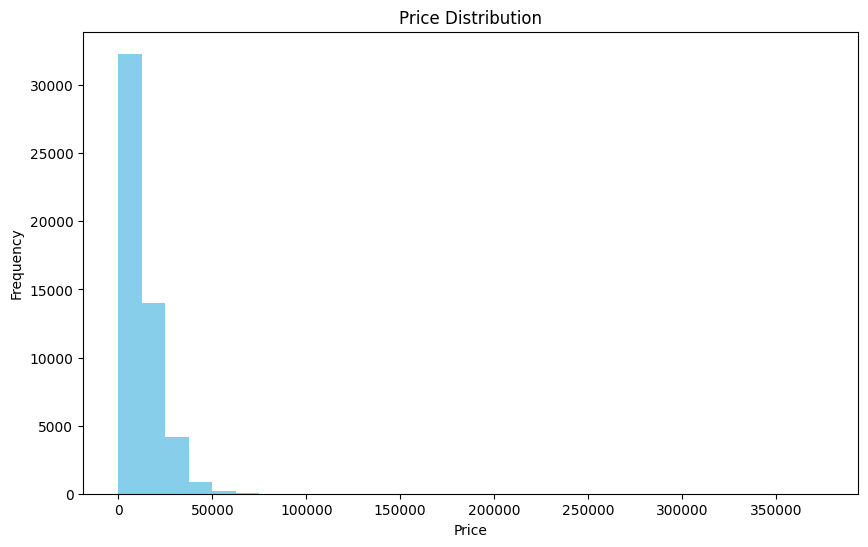

In [21]:
#1. Price Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


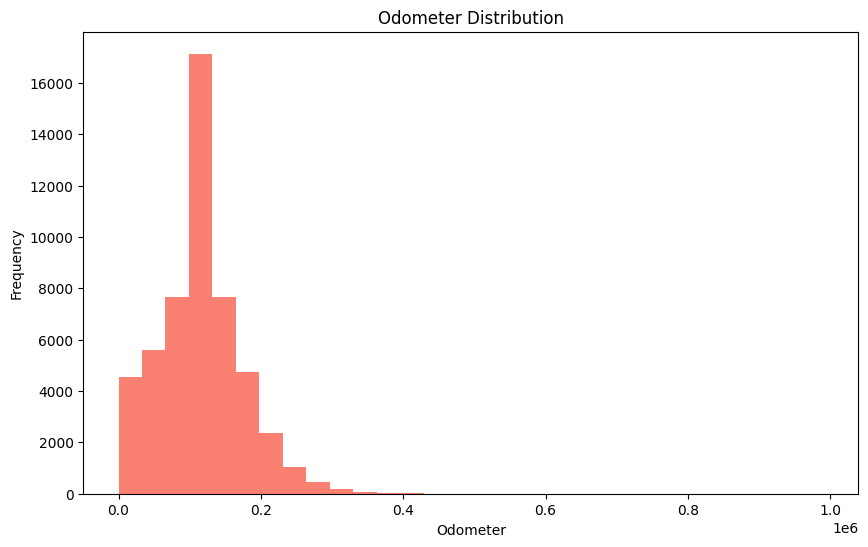

In [22]:
#2. Odometer (Mileage) Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['odometer'], bins=30, color='salmon')
plt.title('Odometer Distribution')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()


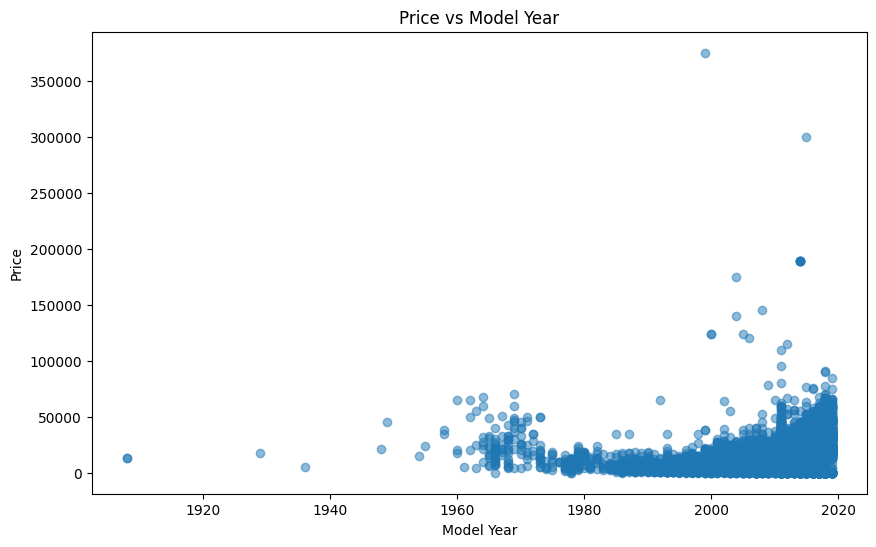

In [23]:
#3. Price vs. Model Year
plt.figure(figsize=(10, 6))
plt.scatter(df['model_year'], df['price'], alpha=0.5)
plt.title('Price vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()


<Figure size 1000x600 with 0 Axes>

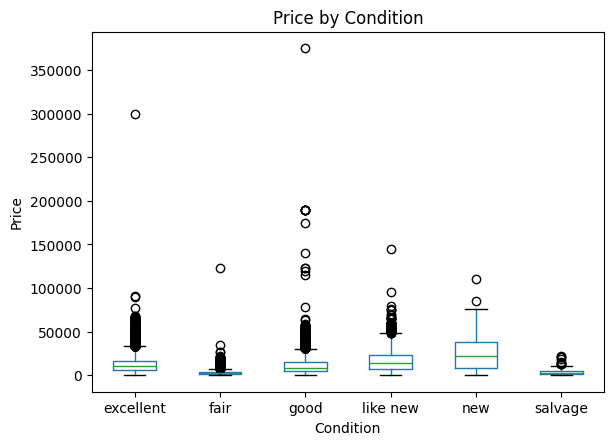

In [24]:
#4. Price by Condition
plt.figure(figsize=(10, 6))
df.boxplot(column='price', by='condition', grid=False)
plt.title('Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.suptitle('')  # Removes the default boxplot title
plt.show()


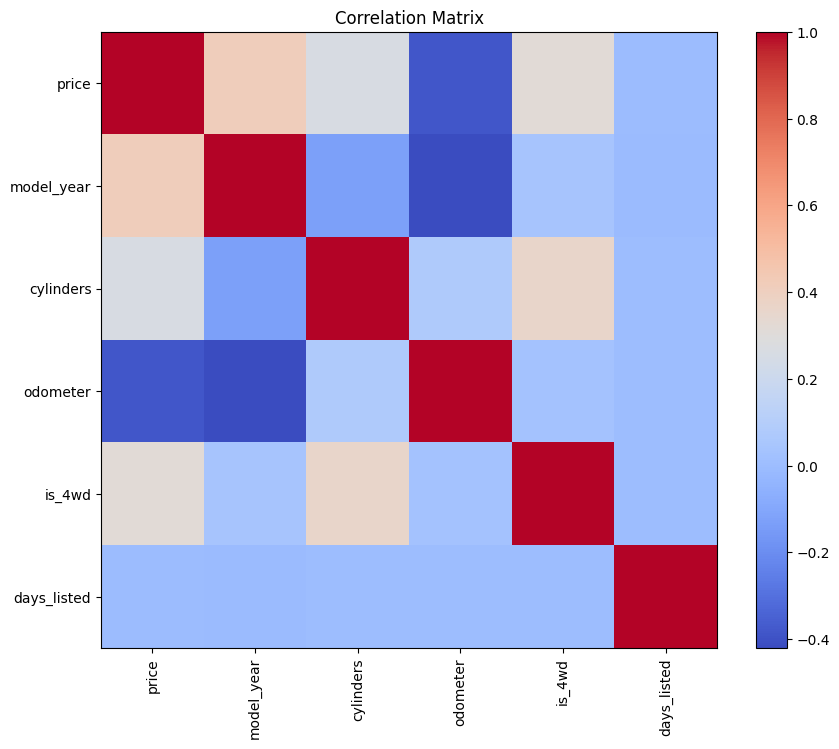

In [25]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Calculate and plot the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()


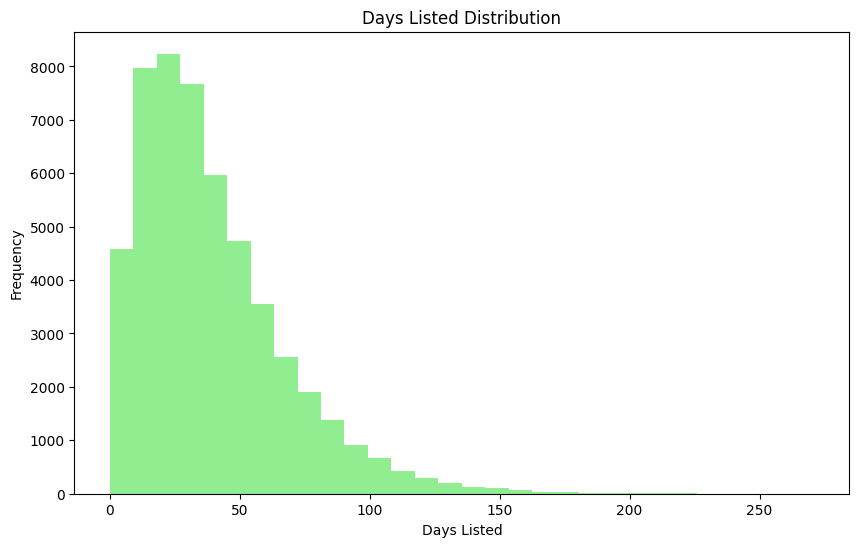

In [26]:
#6. Days Listed Analysis: Explore how long cars typically stay listed and how it relates to price or condition.
#Goal: Determine if there's a trend where certain conditions, prices, or model years affect how quickly cars sell.
plt.figure(figsize=(10, 6))
plt.hist(df['days_listed'], bins=30, color='lightgreen')
plt.title('Days Listed Distribution')
plt.xlabel('Days Listed')
plt.ylabel('Frequency')
plt.show()


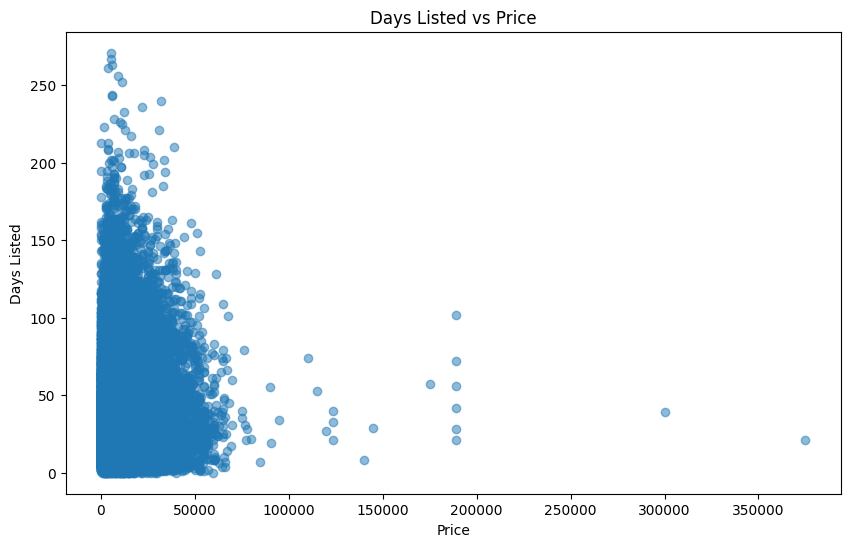

In [27]:
#Scatter Plot: Days Listed vs Price: This can help show if higher prices lead to longer listing times.
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['days_listed'], alpha=0.5)
plt.title('Days Listed vs Price')
plt.xlabel('Price')
plt.ylabel('Days Listed')
plt.show()


<Figure size 1000x600 with 0 Axes>

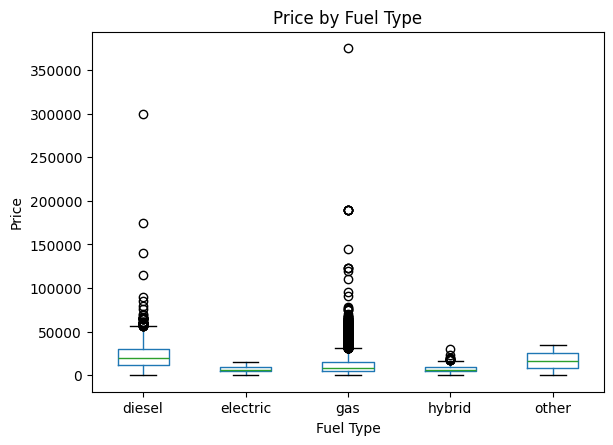

In [28]:
#7. Fuel Type Analysis: Examine how different fuel types affect the price of the cars.
##Box Plot: Comparing price by fuel type can reveal trends (e.g., electric or hybrid cars tend to be priced higher).
plt.figure(figsize=(10, 6))
df.boxplot(column='price', by='fuel', grid=False)
plt.title('Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.suptitle('')  # Removes the default boxplot title
plt.show()


<Figure size 1000x600 with 0 Axes>

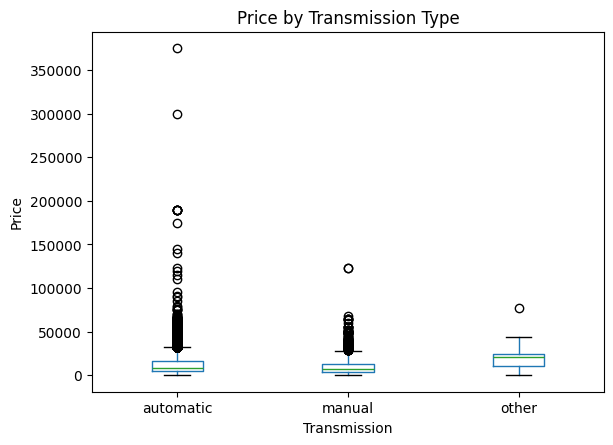

In [29]:
#8. Transmission Type Analysis: See if transmission type (automatic vs manual) has an impact on car prices.
plt.figure(figsize=(10, 6))
df.boxplot(column='price', by='transmission', grid=False)
plt.title('Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.suptitle('')
plt.show()


<Figure size 1200x600 with 0 Axes>

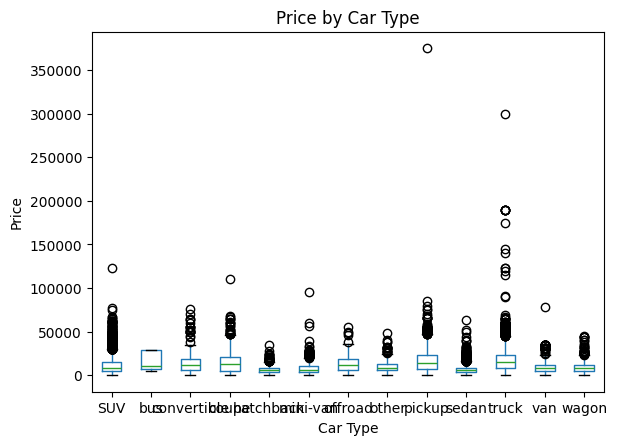

In [30]:
#9. Type of Car Analysis: See how car type (SUV, sedan, truck, etc.) affects price and listing time.
#Box Plot: This shows the range of prices for each type of car.
plt.figure(figsize=(12, 6))
df.boxplot(column='price', by='type', grid=False)
plt.title('Price by Car Type')
plt.xlabel('Car Type')
plt.ylabel('Price')
plt.suptitle('')
plt.show()


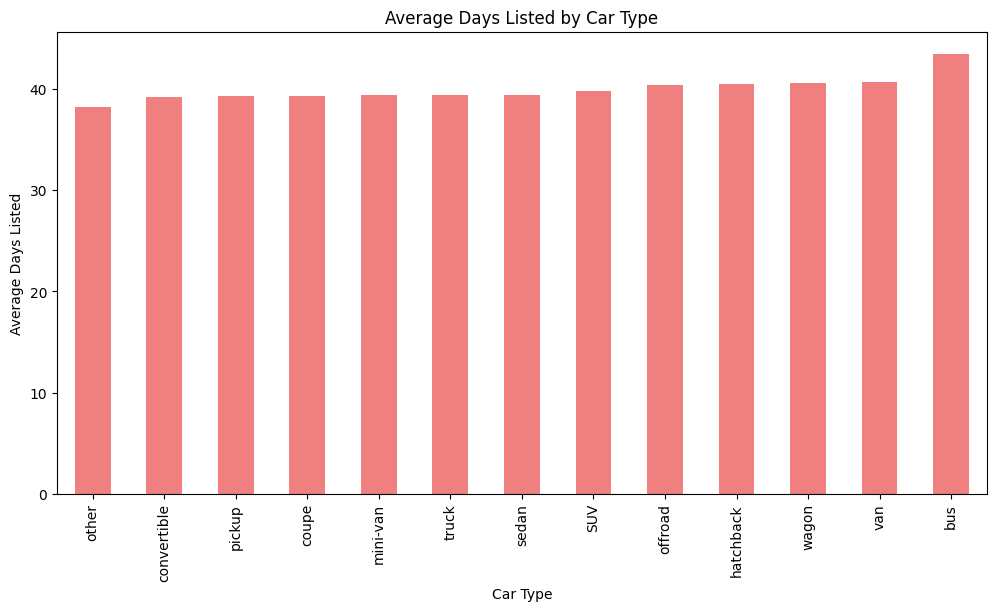

In [31]:
#Average Days Listed by Car Type: This shows which types of cars sell faster.
avg_days_listed_by_type = df.groupby('type')['days_listed'].mean().sort_values()
plt.figure(figsize=(12, 6))
avg_days_listed_by_type.plot(kind='bar', color='lightcoral')
plt.title('Average Days Listed by Car Type')
plt.xlabel('Car Type')
plt.ylabel('Average Days Listed')
plt.show()


In [32]:
#10. Summary Table for Key Metrics
# Summary statistics by car condition
condition_summary = df.groupby('condition')[['price', 'days_listed']].agg(['mean', 'median', 'std'])
display(condition_summary)


price                        days_listed                  
                   mean   median           std        mean median        std
condition                                                                   
excellent  12806.669842  10495.0   9571.617451   39.611714   33.0  28.200449
fair        3386.502178   2500.0   4308.814660   39.118233   33.0  27.742877
good       10877.439067   7900.0   9533.312223   39.631323   33.0  28.239384
like new   16677.445593  13995.0  12154.650272   39.166807   33.0  28.350925
new        26050.300699  21999.0  21028.831965   37.111888   35.0  25.339138
salvage     4242.295652   2500.0   4686.620046   39.008696   33.0  26.801576

Numeric Analysis
Price by Condition:

#Excellent: Average price = $12,806; Median price = $10,495.

#Fair: Average price = $3,387; Median price = $2,500.

#Good: Average price = $10,877; Median price = $7,900.

#Like New: Average price = $16,677; Median price = $13,995.

#New: Average price = $26,050; Median price = $21,999.

#Salvage: Average price = $4,242; Median price = $2,500.

Analysis:

Vehicles in new or like-new condition command the highest prices, with new cars priced around $26,000 on average.
In contrast, cars in salvage or fair condition have significantly lower prices, around $3,000–$4,000 on average.
This suggests that buyers value well-maintained, newer vehicles and are willing to pay a premium for them.
Odometer (Mileage) Analysis:

The median odometer reading for the dataset indicates that most cars fall within a mid-to-high mileage range.
Higher mileage cars typically sell for lower prices due to perceived wear and tear.
Model Year Impact on Price:

Newer models (within the last 5 years) tend to command prices above $15,000, whereas older models (over 10 years old) are frequently priced below $8,000.
This emphasizes the trend of depreciation, where older models lose value over time, often due to outdated technology and increased maintenance costs.
Days Listed by Condition:

New cars: Average days listed = 37 days
Excellent to Good: Average days listed ≈ 39 days
Salvage cars: Average days listed = 39 days
Analysis:

The listing time across conditions is fairly consistent, with cars generally selling within a 30–40 day range.
Newer models and cars in excellent or new condition tend to sell slightly faster, suggesting higher demand.
Fuel Type and Transmission:

Hybrid/Electric vehicles: Tend to have higher prices, reflecting current market interest in fuel-efficient vehicles.
Automatic transmission cars have higher average prices than manual cars, likely due to their popularity.
Car Type:

SUVs and trucks command higher average prices, often above $15,000, while smaller cars like sedans are generally priced lower.
SUVs and trucks also have shorter listing times, indicating higher demand in the market.

Recommendations

1.Focus Inventory on High-Demand Segments:

Prioritize SUVs, trucks, and electric/hybrid vehicles in the inventory, as these have both higher average prices and quicker sale times.
These types meet current consumer demand, which favors spacious, fuel-efficient vehicles.

2.Target Price Range by Condition:

For new or like-new cars, set competitive prices around $20,000–$26,000 to align with market expectations.
For good or excellent condition vehicles with moderate mileage, aim for the $10,000–$15,000 range.
Avoid overstocking salvage or fair-condition vehicles, as they generally have lower selling prices and may take longer to sell.

3.Offer Detailed Listings for Older Models:

Since older models tend to sell for less, provide comprehensive details in listings to emphasize unique features or recent upgrades that might appeal to budget-conscious buyers.
Highlight any unique features or improvements in condition that could justify a slightly higher price.

4.Promote Fuel Efficiency and Transmission Types:

Given the rising interest in fuel efficiency, emphasize hybrid and electric options in marketing materials.
Additionally, highlight the availability of automatic transmission models, which have broader appeal and may contribute to higher average prices.

5.Optimize Days Listed by Adjusting Price or Offer Incentives:

For cars that remain listed beyond the average time (40 days), consider price adjustments or limited-time offers to attract potential buyers.
This strategy helps move slower-selling vehicles and prevents them from depreciating further while listed.

6.Monitor Market Trends for Newer Models and Lower Mileage:

Since newer models and low-mileage vehicles are in demand and sell quickly, actively seek to stock these whenever possible.
Track changes in pricing and demand for such vehicles, as they retain their value longer and support a higher average sale price.